<a href="https://colab.research.google.com/github/shrishtinigam/dyslexic-character-recognition/blob/main/Char_Recog_(Normal%2C_Reversed)_CNN_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building the dataset
### Getting the images from the drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

 Books					  'Normal Old'
 calibrate				  'Photogrammetry '
 character-bot				   Reversal
'Colab Notebooks'			  'rrf-zqdw-vtb - Nov 7, 2022 (1).gjam'
 constraint_Hindi_Train.csv		  'rrf-zqdw-vtb - Nov 7, 2022 (2).gjam'
 Constraint_Hindi_Valid.csv		  'rrf-zqdw-vtb - Nov 7, 2022.gjam'
 d4					  'sem 3'
'DocScanner Mar 31, 2022 1-32 AM.pdf'	   TrainDyslexic100
'Document from Meher Shrishti Nigam.pdf'   TrainDyslexic20
 hindicorpus				  'train normal 100'
 img2					   TrainNormal100
 img3					   TrainNormal20
'INTERVIEW PREP'			   TrainNormal20Old
 MNER.gdoc				   vocab.txt
 Normal


In [ ]:
import os
import glob
import string

In [ ]:
import cv2 as cv2
from google.colab.patches import cv2_imshow

## TARGET: Given a single image of a letter, the model is able to classify it as "Normal" or "Dyslexic" and able to tell character it is, as well as what it is supposed to be.

In [ ]:
alphabets = []
for letter in string.ascii_uppercase:
  alphabets.append(letter)

In [ ]:
images = []
x = 0
for letter in alphabets:
  image_paths = glob.glob(f"/content/drive/My Drive/TrainNormal20/" + letter + "*.png")
  for i in image_paths:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append([image, x])
  x += 1

In [ ]:
"""for letter in alphabets:
  image_paths_dyx = glob.glob(f"/content/drive/My Drive/TrainDyslexic20/" + letter + "*.png")
  for i in image_paths_dyx:
    image = cv2.imread(i)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append([image, x])
  x += 1"""

'for letter in alphabets:\n  image_paths_dyx = glob.glob(f"/content/drive/My Drive/TrainDyslexic20/" + letter + "*.png")\n  for i in image_paths_dyx:\n    image = cv2.imread(i)\n    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    images.append([image, x])\n  x += 1'

In [ ]:
x = 26
image_paths_dyx = glob.glob(f"/content/drive/My Drive/TrainDyslexic20/*.png")
for i in image_paths_dyx:
  image = cv2.imread(i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  images.append([image, x])

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(images)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1042 non-null   object
 1   1       1042 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.4+ KB


In [ ]:
df.shape

(1042, 2)

In [ ]:
df

,0,1
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
...,...,...
1037,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26
1038,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26
1039,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26
1040,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26


In [ ]:
df.rename(columns = {0:'Character', 1:'Class'}, inplace = True)

In [ ]:
df.columns

Index(['Character', 'Class'], dtype='object')

In [ ]:
df = df.sample(frac=1)

In [ ]:
def zeroPadTill(image, r, c):
  ri, ci = image.shape
  # ri, ci, x = image.shape
  pad_rows = r-ri
  pad_cols = c-ci
  image = cv2.copyMakeBorder(image, pad_rows, 0, pad_cols, 0, cv2.BORDER_CONSTANT)
  return image

In [ ]:
data = []
for image in df['Character']:
  image = zeroPadTill(image, 32, 32)
  data.append(image)
data = np.array(data)

In [ ]:
for i in range(data.shape[0]):
  #print(data[i].shape)
  if(data[i].shape[0] != 32 or data[i].shape[1] != 32):
    print(i)

In [ ]:
labels = df['Class'].to_numpy()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state =42)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 32, 32, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 32, 32, 1)).astype('float32')

In [ ]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

In [ ]:
img_size = 32

In [ ]:
y_test_df = y_test.copy()

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
num_classes = df["Class"].unique().size
num_classes

27

In [ ]:
df["Class"].value_counts()

26    522
8      22
13     20
2      20
5      20
25     20
17     20
14     20
24     20
4      20
3      20
9      20
22     20
23     20
1      20
6      20
7      20
10     20
18     20
20     20
21     20
15     20
19     20
12     20
16     20
0      20
11     18
Name: Class, dtype: int64

In [ ]:
df

,Character,Class
784,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26
563,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26
22,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
842,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26
337,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",16
...,...,...
10,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
896,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26
975,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [ ]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# build the model
model = baseline_model()
print(model.summary())
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 27)                3483      
                                                      

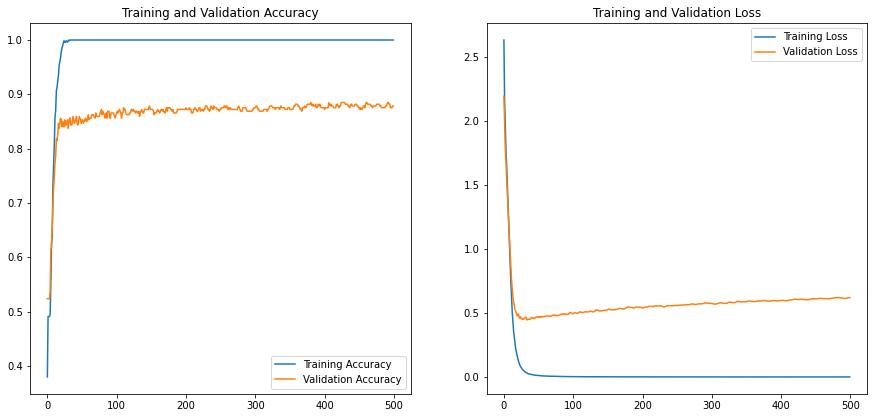

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predicts = model.predict(x_test)

10/10 [==============================] - 0s 9ms/step


In [ ]:
type(predicts)

numpy.ndarray

In [ ]:
predicts_labels = []
for i in predicts:
  predicts_labels.append(np.argmax(i))
predicts_labels = np.array(predicts_labels)

In [ ]:
y_test_df = np.array(y_test_df)
y_test_df

array([19,  3, 26, 14,  2, 21, 26, 17, 26,  6,  5, 20, 26,  3,  9, 26, 22,
       17, 26, 26, 26, 11, 26, 26, 20, 26, 18, 10,  4, 26, 26, 26, 26, 25,
        8, 26, 26, 21, 26, 26, 26, 15, 26, 26, 26, 22, 26,  3, 26, 26,  6,
       25, 25, 26,  8,  0, 26, 15, 26, 23,  9, 26, 24,  3, 21, 10, 18,  3,
       20, 26, 26, 19, 26, 26, 26, 26, 26, 20, 26, 26, 24, 26,  6, 26, 18,
       26, 26, 26, 26,  6, 26, 26, 26, 23, 26,  2,  8, 26, 26, 26, 26, 20,
       11, 10, 24, 26, 26, 20, 26, 26, 26, 11, 26, 26, 26, 26, 26, 12,  4,
       17, 13,  5,  1, 26, 26, 26, 24, 13, 26, 26, 19, 26, 13, 14, 26,  9,
       26, 26, 26, 26, 26, 26,  9, 26,  8, 25, 26, 26,  1, 26,  0, 19, 16,
        9, 26, 26, 26, 26, 26,  1, 26,  7, 13, 26,  7, 26, 21, 26, 26, 26,
        5, 26, 26, 16, 26, 17, 23, 26,  3,  4, 19, 26, 26, 26, 26, 26, 26,
        6,  6, 17, 25,  1, 26, 19, 23, 16, 26, 26, 26, 15, 23, 24, 26, 26,
        2, 26,  8, 26, 26, 26, 26, 10, 26, 26,  5, 26, 26, 22,  2, 26,  8,
       26, 26, 26, 26,  2

In [ ]:
len(y_test_df)

313

In [ ]:
predicts_labels

array([19,  3, 26, 14,  2, 21, 26, 10, 26,  2,  5, 20, 14,  3, 26, 26, 22,
       17, 26, 26, 11, 11, 26, 26, 22, 26, 18, 10,  4, 26, 26, 26, 26,  8,
        8, 26, 26, 21, 26, 26, 26, 15, 26, 26, 26,  7, 26,  3, 26, 26,  6,
       25, 11, 26,  8,  7, 26,  3, 26, 23,  9, 26, 19, 26, 21, 10, 18,  3,
       20, 26, 26, 19, 26, 26, 26, 26, 26, 20, 26, 26, 21, 26,  6, 26, 18,
       26, 26, 26, 26,  6, 14, 26, 26, 23, 26,  2,  8, 26, 23, 26, 26, 13,
       11, 10, 19, 26, 26, 20, 26, 26, 26, 11, 26, 26, 26, 26, 26, 12,  4,
       17, 13,  5,  1, 26, 26, 26, 24, 13, 26, 26, 19, 26, 20, 14, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26,  8, 25, 26, 26,  1, 26,  0, 19, 16,
        9, 26, 26, 26, 26, 26, 18, 26,  7, 13, 26,  7, 26, 21, 26, 26, 26,
        5, 26, 26, 16, 26,  1, 23, 26,  3,  4, 19, 26, 26, 26, 26, 16, 26,
        6,  6, 17, 25,  1, 26,  9, 23, 16, 26, 26, 26, 15, 23, 24, 26, 26,
        2, 26, 19, 26, 26, 26, 26, 13, 26, 26, 15, 26, 26, 22,  2, 26,  8,
       26, 26, 26, 26,  2

In [ ]:
len(predicts_labels)

313

In [ ]:
k = 0
for i in range(len(y_test_df)):
  if(y_test_df[i] == predicts_labels[i]):
    k += 1
print(k)
print((k/len(y_test_df))*100)

275
87.8594249201278


In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_test_df,predicts_labels,average='micro'))
print('Recall: %.3f' % recall_score(y_test_df, predicts_labels,average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test_df, predicts_labels))
print('F1-Score: %.3f' % f1_score(y_test_df, predicts_labels,average='micro'))

Precision: 0.879
Recall: 0.879
Accuracy: 0.879
F1-Score: 0.879
